In [20]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd().parent))

In [21]:
from codes.utils import load_alpha_digits
import matplotlib.pyplot as plt
import numpy as np
from codes.DNN import DNN

# Alpha Digits Test DBN

In [22]:
def alpha(up_to):
    data = load_alpha_digits()
    digits = []
    for digit_idx in range(up_to+1):
        digit = [data["dat"][10+digit_idx][i].flatten() for i in range(data["dat"][digit_idx].shape[0])]
        digit = np.array(digit)
        digits.append(digit)

    digits = np.concatenate(digits)
    return digits

def gen_and_plot(dnn: DNN):
    fig, axs = plt.subplots(1, 5)
    fig.set_size_inches(17, 3)
    gen = dnn.generate_image_DBN(5, 100, reshape=(20, 16))
    for i in range(5):
        axs[i].imshow(gen[i], cmap='gray')
    plt.show()

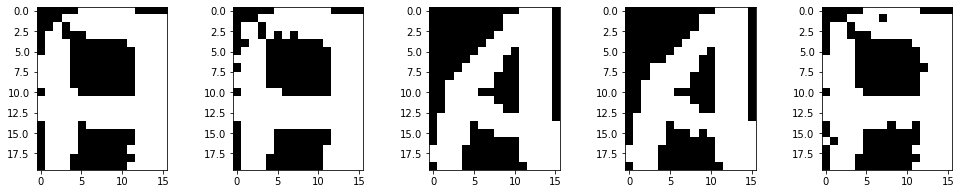

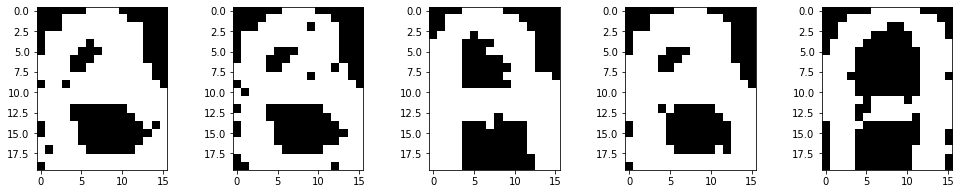

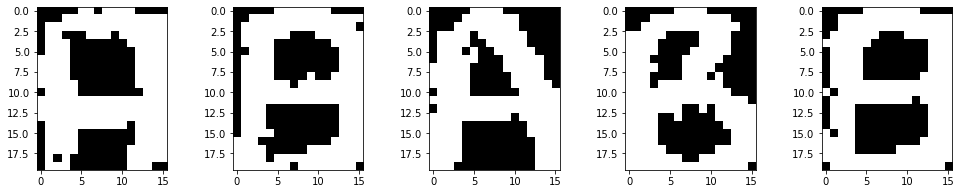

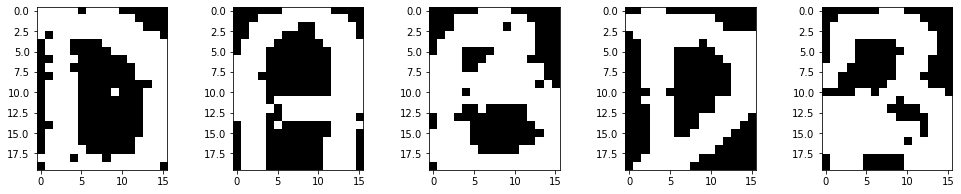

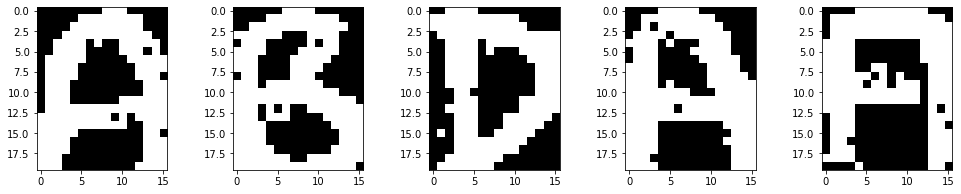

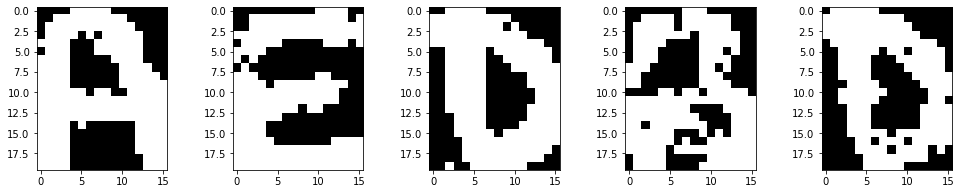

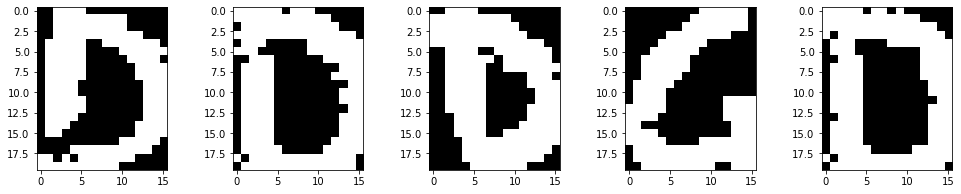

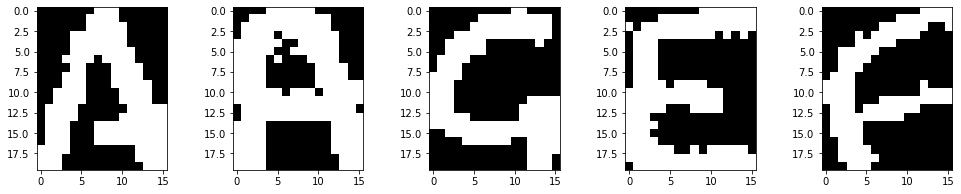

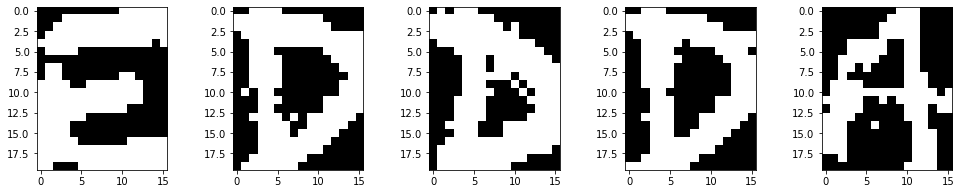

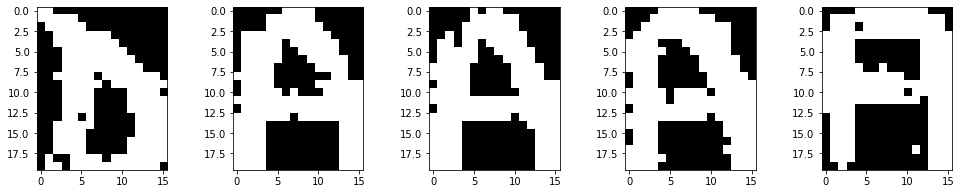

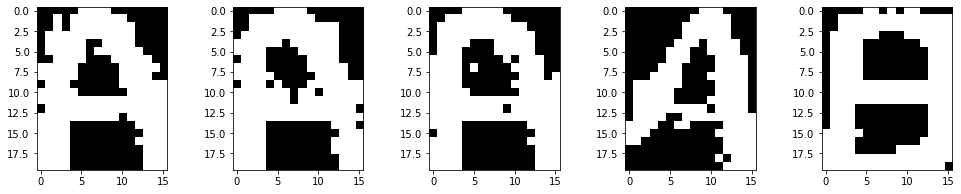

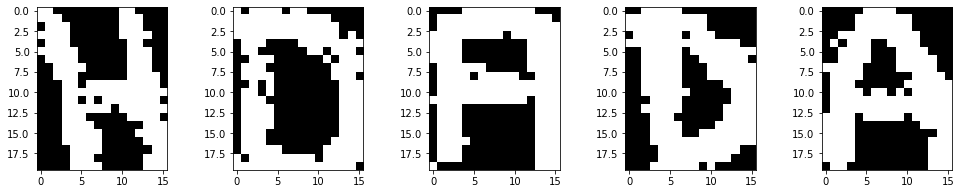

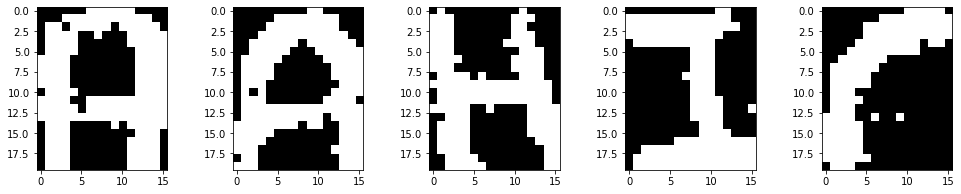

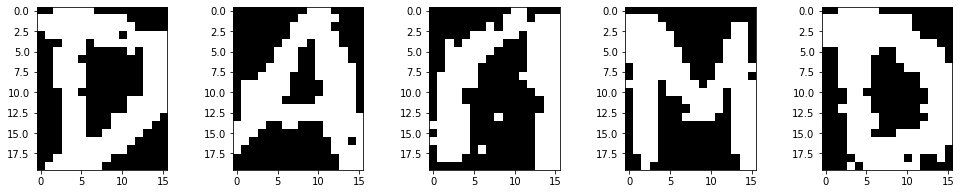

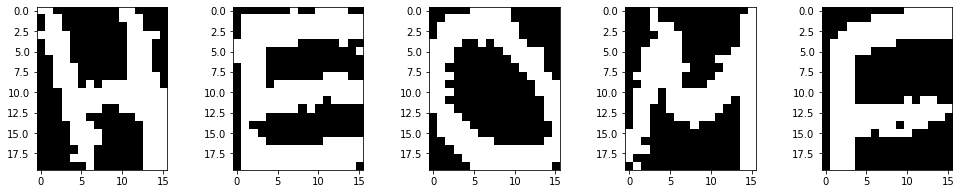

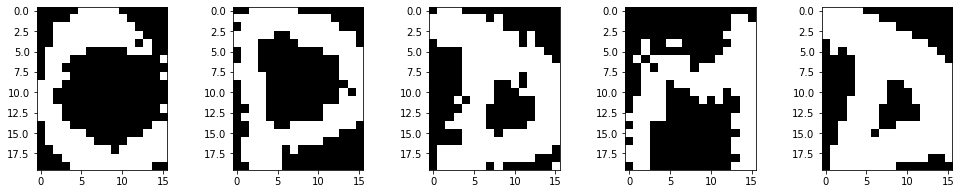

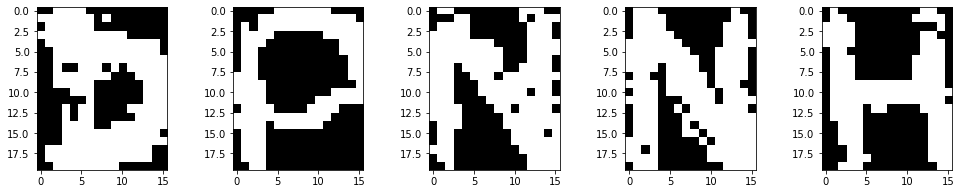

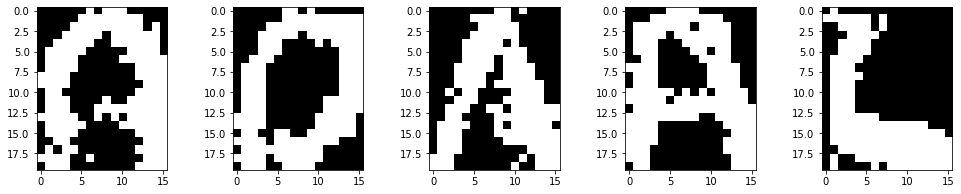

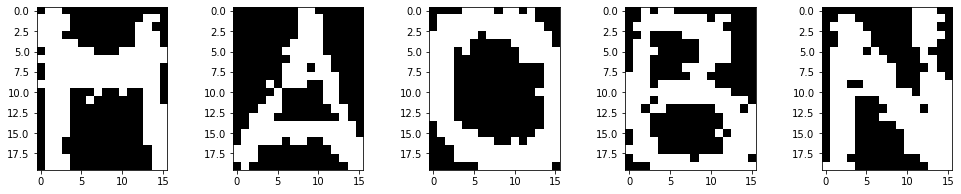

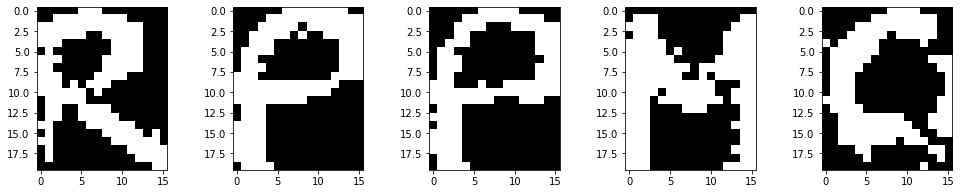

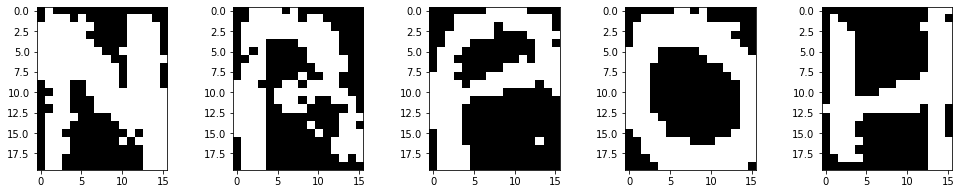

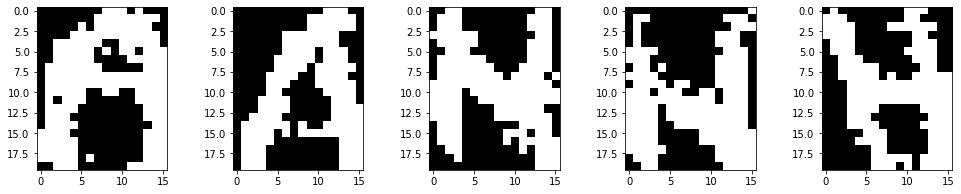

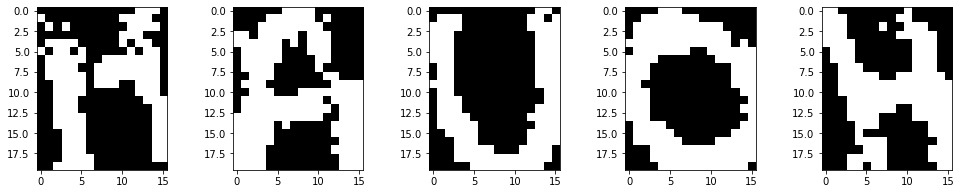

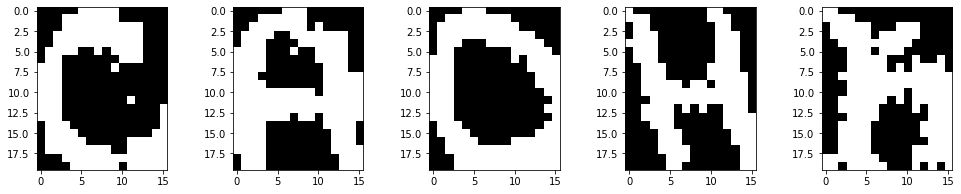

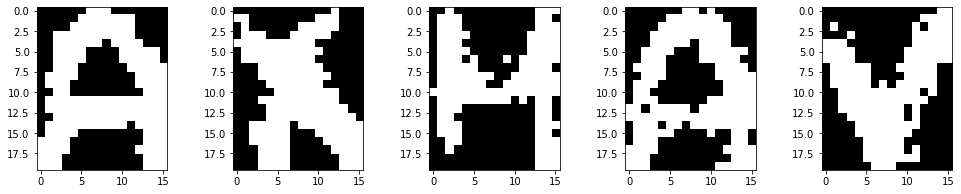

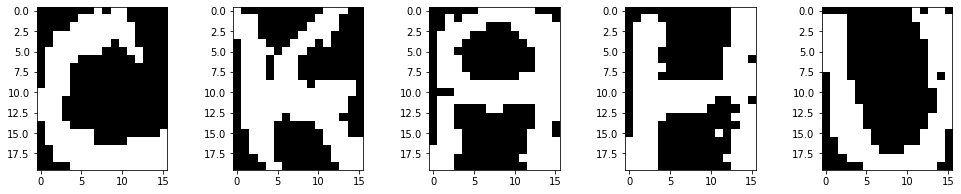

In [23]:
for letter in range(26):
    reduced_dataset = alpha(up_to=letter)
    dnn = DNN(reduced_dataset.shape[1], [300, 200, 100], 10)
    errors = dnn.pretrain(reduced_dataset, 16, num_epochs=500, lr=0.1, verbose=False, no_tqdm=True)
    gen_and_plot(dnn)

# Test Classif without more training

In [21]:
from codes.utils import load_alpha_digits
import matplotlib.pyplot as plt
import numpy as np
from codes.DNN import DNN

data = load_alpha_digits()
digits = []
for digit_idx in range(10):
    digit = [data["dat"][digit_idx][i].flatten() for i in range(data["dat"][digit_idx].shape[0])]
    digit = np.array(digit)
    digits.append(digit)

digits = np.concatenate(digits)
digits.shape

(390, 320)

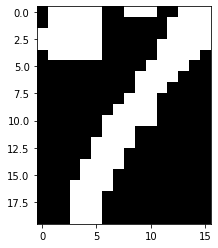

In [22]:
plt.imshow(digits[7*39 + 10].reshape(20,16), cmap='gray')

In [24]:
dnn = DNN(digits.shape[1], [150, 50], 10)

dnn.pretrain(digits, 32, num_epochs=1000, lr=0.1, verbose=False, no_tqdm=True)

Layer pretrain epoch : 97:  10%|█████                                                | 96/1000 [00:03<00:31, 28.84it/s]


Layer pretrain epoch : 199:  20%|██████████                                         | 197/1000 [00:07<00:27, 28.92it/s]


Layer pretrain epoch : 301:  30%|███████████████▏                                   | 299/1000 [00:10<00:24, 29.02it/s]


Layer pretrain epoch : 401:  40%|████████████████████▍                              | 400/1000 [00:13<00:20, 29.17it/s]


Layer pretrain epoch : 503:  50%|█████████████████████████▋                         | 504/1000 [00:17<00:17, 29.17it/s]


Layer pretrain epoch : 606:  60%|██████████████████████████████▊                    | 604/1000 [00:20<00:13, 30.40it/s]


Layer pretrain epoch : 710:  71%|████████████████████████████████████▎              | 711/1000 [00:24<00:09, 29.76it/s]


Layer pretrain epoch : 813:  81%|█████████████████████████████████████████▍         | 813/1000 [00:27<00:06, 28.14it/s]


Layer pretrain epoch : 915:  92%|██████████████████████████████████████████████▋    | 916/1000 [00:31<00:02, 29.27it/s]


Layer pretrain epoch : 20:   2%|▊                                                    | 16/1000 [00:00<00:12, 78.68it/s]


Layer pretrain epoch : 137:  14%|██████▉                                            | 136/1000 [00:01<00:11, 73.16it/s]


Layer pretrain epoch : 255:  25%|████████████▋                                      | 249/1000 [00:03<00:09, 75.25it/s]


Layer pretrain epoch : 372:  37%|██████████████████▊                                | 370/1000 [00:04<00:08, 77.26it/s]


Layer pretrain epoch : 490:  48%|████████████████████████▋                          | 484/1000 [00:06<00:06, 78.79it/s]


Layer pretrain epoch : 607:  61%|███████████████████████████████                    | 608/1000 [00:07<00:04, 78.68it/s]


Layer pretrain epoch : 725:  73%|█████████████████████████████████████              | 726/1000 [00:09<00:03, 78.61it/s]


Layer pretrain epoch : 843:  84%|███████████████████████████████████████████        | 844/1000 [00:10<00:01, 78.66it/s]


Layer pretrain epoch : 961:  96%|████████████████████████████████████████████████▉  | 960/1000 [00:12<00:00, 77.73it/s]


Layer pretrain epoch : 999: 100%|██████████████████████████████████████████████████▋| 995/1000 [00:12<00:00, 79.82it/s]


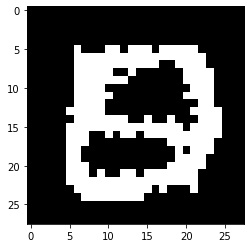

In [108]:
plt.imshow(dnn.generate_image_DBN(1,100, reshape=(20,16))[0], cmap='gray')
plt.show()

# Test MNIST

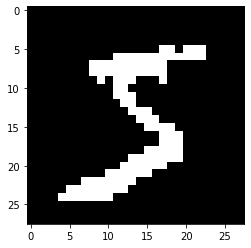

In [147]:
from codes.utils import load_mnist
from codes.DNN import DNN
import matplotlib.pyplot as plt
import numpy as np

train = load_mnist()
img = train[0][0]
label = train[1][0]

plt.imshow(img[0], cmap='gray')
plt.show()

In [148]:
img = [img[i].flatten().reshape(1,-1) for i in range(img.shape[0])]
img = np.concatenate(img)

In [153]:
# les than 5
numbers = train[0][0][train[1][0]<5]
numbers = [numbers[i].flatten() for i in range(numbers.shape[0])]
numbers = np.array(numbers)
numbers.shape

(30596, 784)

In [154]:
dnn = DNN(784, [512, 128], 10)
# indices = np.random.permutation(60000)
dnn.pretrain(img, 128, num_epochs=100, lr=0.1, verbose=False)

Layer pretrain epoch : 64:  65%|███████████████████████████████████                   | 65/100 [15:34<08:15, 14.14s/it]


Layer pretrain epoch : 29:  30%|████████████████▏                                     | 30/100 [01:24<03:30,  3.00s/it]


Layer pretrain epoch : 95:  96%|███████████████████████████████████████████████████▊  | 96/100 [04:34<00:11,  2.78s/it]


Layer pretrain epoch : 99: 100%|█████████████████████████████████████████████████████| 100/100 [04:45<00:00,  2.78s/it]


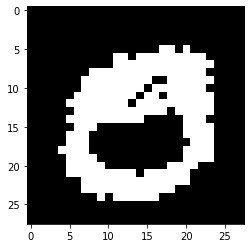

In [232]:
plt.imshow(dnn.generate_image_DBN(1,100, reshape=(28, 28))[0], cmap='gray')
plt.show()